In [47]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import gc
import pdet
import fpfs
import fitsio
import numpy as np
from fpfs import pltutil
import matplotlib.pylab as plt
import numpy.lib.recfunctions as rfn
from default import *

import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2.0 #set the value globally

ver='try2'
gver='basic2Center'
dver='cut16'
wrkDir=os.environ['homeWrk']
simDir=os.path.join(wrkDir,'FPFS2/sim/')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
#nver='var1em9' # 'var0em0'#
#nver='var7em3' # 'var0em0'#
nver='var0em0' # 'var0em0'#
mm1=[]
mm2=[]
for _i in range(20):
    _a1=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-0000.fits' %(gver,nver,ver,dver,_i)))
    _a2=fitsio.read(os.path.join(simDir,'srcfs3_%s-%s_%s/psf60/fpfs-%s-%04d-g1-2222.fits' %(gver,nver,ver,dver,_i)))
    mm1.append(_a1)
    mm2.append(_a2)
    del _a1,_a2#,msk1,msk2
mm1 =   rfn.stack_arrays(mm1,usemask=False)
mm2 =   rfn.stack_arrays(mm2,usemask=False)
gc.collect()
Const  =   20.
noirev =   False
ellM1  =   fpfs.catalog.fpfsM2E(mm1,const=Const,noirev=noirev)
ellM2  =   fpfs.catalog.fpfsM2E(mm2,const=Const,noirev=noirev)
gc.collect()

0

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 1.000e+00,
        3.000e+00, 5.000e+00, 1.900e+01, 4.500e+01, 9.900e+01, 2.090e+02,
        3.960e+02, 7.180e+02, 1.201e+03, 1.828e+03, 2.581e+03, 3.218e+03,
        4.073e+03, 4.865e+03, 5.786e+03, 6.313e+03, 6.802e+03, 6.418e+03,
        6.415e+03, 5.962e+03, 5.524e+03, 5.117e+03, 4.875e+03, 4.449e+03,
        4.207e+03, 3.887e+03, 3.752e+03, 3.555e+03, 3.300e+03, 3.136e+03,
        2.859e+03, 2.790e+03, 2.612e+03, 2.497e+03, 2.322e+03, 2.216e+03,
        2.108e+03, 1.965e+03, 1.857e+03, 1.914e+03, 1.754e+03, 1.668e+03,
        1.528e+03, 1.540e+03]),
 array([-0.02  , -0.0156, -0.0112, -0.0068, -0.0024,  0.002 ,  0.0064,
         0.0108,  0.0152,  0.0196,  0.024 ,  0.0284,  0.0328,  0.0372,
         0.0416,  0.046 ,  0.0504,  0.0548,  0.0592,  0.0636,  0.068 ,
         0.0724,  0.0768,  0.0812,  0.0856,  0.09  ,  0.0944,  0.0988,
         0.1032,  0.1076,  0.112 ,  0.1164,  0.1208,  0.1252,  0.1296,
         0.134 ,  0.1

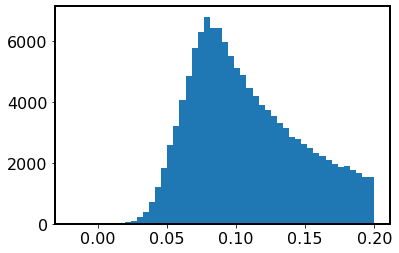

In [48]:
plt.close()
plt.hist(mm1['fpfs_v0']-0.005*mm1['fpfs_M00'],range=(-0.02,0.2),bins=50)
#plt.yscale('log')